Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Шаг 1.  Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Пороговое значение *alpha* задайте самостоятельно.

Поясните:

- Как вы формулировали нулевую и альтернативную гипотезы;
- Какой критерий использовали для проверки гипотез и почему.

# 1. Аналитика

In [1]:
import pandas as pd

In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv')

In [3]:
query_3 = pd.read_csv('/datasets/query_3.csv')

In [4]:
query_1.head(3)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630


In [5]:
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [6]:
query_3.head(3)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290


In [7]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


## Комментарий наставника

In [8]:
query_3['number_of_flights'] = query_3['average_flights'] * 30

In [9]:
query_3_top10 = query_3.nlargest(10, 'average_flights').copy()
query_3_top10 = query_3_top10.reset_index(drop = True)

In [10]:
query_3_top10

,city,average_flights,number_of_flights
0,Москва,129.774194,3893.225806
1,Санкт-Петербург,31.161290,934.838710
2,Новосибирск,17.322581,519.677419
3,Красноярск,11.580645,347.419355
4,Екатеринбург,11.322581,339.677419
5,Ростов-на-Дону,10.193548,305.806452
6,Пермь,10.129032,303.870968
7,Брянск,10.000000,300.000000
8,Сочи,9.612903,288.387097
9,Ульяновск,9.580645,287.419355


In [11]:
import matplotlib as plt

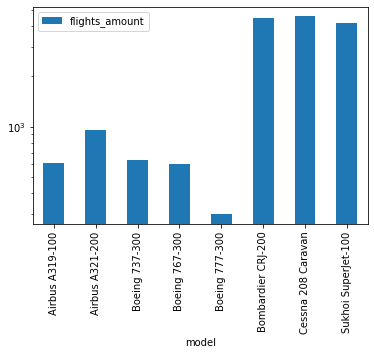

In [12]:
query_1.plot(x ='model', y='flights_amount', kind = 'bar',logy = True)

## Комментарий наставника
<span style="color:green">Вопросов нет.</span>

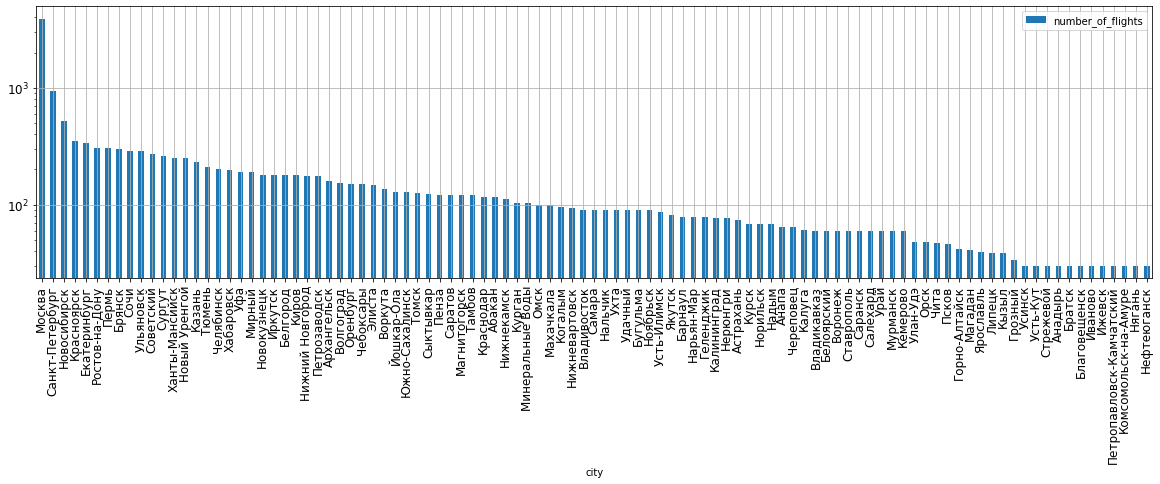

In [13]:
query_3.sort_values(by = 'number_of_flights', ascending = False).plot(x ='city', y='number_of_flights',
                                                                      kind = 'bar',grid = True, figsize  = (20, 5), logy = True,fontsize = 12)

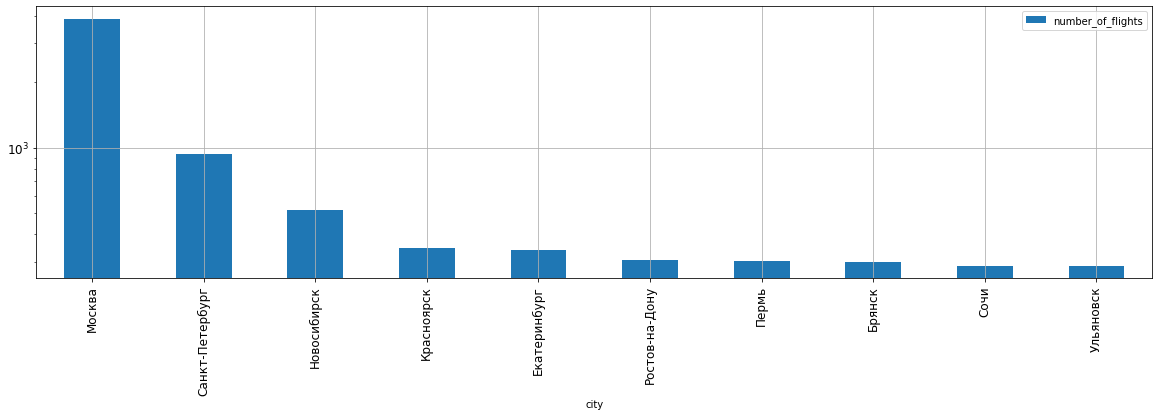

In [14]:
query_3_top10.plot(x ='city', y='number_of_flights',
                   kind = 'bar',grid = True, figsize  = (20, 5), logy = True,fontsize = 12)

# 2. Проверка гипотезы

<font color='magenta'>Посмотрим, что получулось после мучений с SQL, подгрузим последний запрос</font>

In [15]:
query_last = pd.read_csv('/datasets/query_last.csv')

In [16]:
query_last.head(3)

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN


In [17]:
query_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


<font color='magenta'> Создадим датасеты по принципу недели где есть фестиваль и недели где таковых нет</font> 

In [18]:
query_last_fest = query_last.dropna().copy()

In [19]:
query_last_non = pd.concat([query_last, query_last_fest, query_last_fest]).drop_duplicates(keep=False)

<font color='magenta'>Cмотрим статистику по разбивке данных </font> 

In [20]:
query_last_fest.describe()

,week_number,ticket_amount,festival_week
count,3.000000,3.000000,3.000000
mean,32.333333,48662.666667,32.333333
std,3.214550,4415.619700,3.214550
min,30.000000,43568.000000,30.000000
25%,30.500000,47301.000000,30.500000
50%,31.000000,51034.000000,31.000000
75%,33.500000,51210.000000,33.500000
max,36.000000,51386.000000,36.000000


In [21]:
query_last_non.describe()

,week_number,ticket_amount,festival_week
count,7.000000,7.000000,0.0
mean,35.428571,51530.857143,NaN
std,2.636737,130.933098,NaN
min,32.000000,51360.000000,NaN
25%,33.500000,51435.000000,NaN
50%,35.000000,51518.000000,NaN
75%,37.500000,51646.500000,NaN
max,39.000000,51675.000000,NaN


In [22]:
from scipy import stats as st

In [23]:
sample_1 = query_last_fest['ticket_amount']
sample_2 = query_last_non['ticket_amount']


<font color='magenta'> Будем использовать гипотезу о равенстве средних двух генеральных
совокупностей. Те сформулируем и проверим нулевую гипотезу «Средний спрос на билеты во время фестивалей **не отличается** от среднего спроса на билеты в обычное время» Соответсвенно альтернативная гипотеза будет «Средний спрос на билеты во время фестивалей **отличается** от среднего спроса на билеты в обычное время» </font> 

<font color='magenta'>Не забудем указать equal_var = False, так как выборки не имеют одинаковую статистику
</font> 

In [24]:
results = st.ttest_ind(
sample_1,
sample_2,equal_var = False)

In [25]:
print('p-значение: ', results.pvalue)

p-значение:  0.377432493172683


 <font color='magenta'>Выберем пороговое значение apha размером 0.05, как самый распространненый вариант, более сказать не могу, если знаешь математические выкладки почему так делается, с удовольсвтием почитаю)
</font> 


<span style="color:green">На практике чем меньше размер нашей выборки, тем более высоким должен быть уровень значимости, так как существует бОльшая вероятность погрешности при измерениях. При значительном объеме выборки случайные отклонения компенсируют друг друга и вероятность погрешности при измерениях ниже, поэтому порог значимости можно брать меньше. В нашем случае выборка очень маленькая (10 записей) и поэтому порог в 0.05 — 0.1 здесь прекрасно подойдет.</span>

In [26]:
if (results.pvalue < 0.05):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


 <font color='magenta'>**Вывод**: 
- Нулевую гипотезу не получилось отвергнуть. Получается фестивали не приносят дополнительный спрос на авиабилеты в Москоу.
- Статистика по перелетам тоже очевидно вся идет через Москву.
- Главное, чему учит проект - уважать работу аналитика и человека, который вынужден работать с SQL</font> 

# Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Файлы изучены
- [x]  Типы данных проверены на корректность
- [x]  Выбран топ-10 городов по количеству рейсов
- [x]  Построен график «Модели самолётов и количество рейсов»
- [x]  Построен график «Города и количество рейсов»
- [x]  Построен график «Топ-10 городов и количество рейсов»
- [x]  Проверена гипотеза «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время»
- [x]  Есть пояснение «Как вы формулировали нулевую и альтернативную гипотезы»
- [x]  Есть пояснение «Какой критерий использовали для проверки гипотез и почему»
- [x]  На каждом этапе написаны выводы
- [x]  Написан общий вывод